# Multiple times spoofing attack

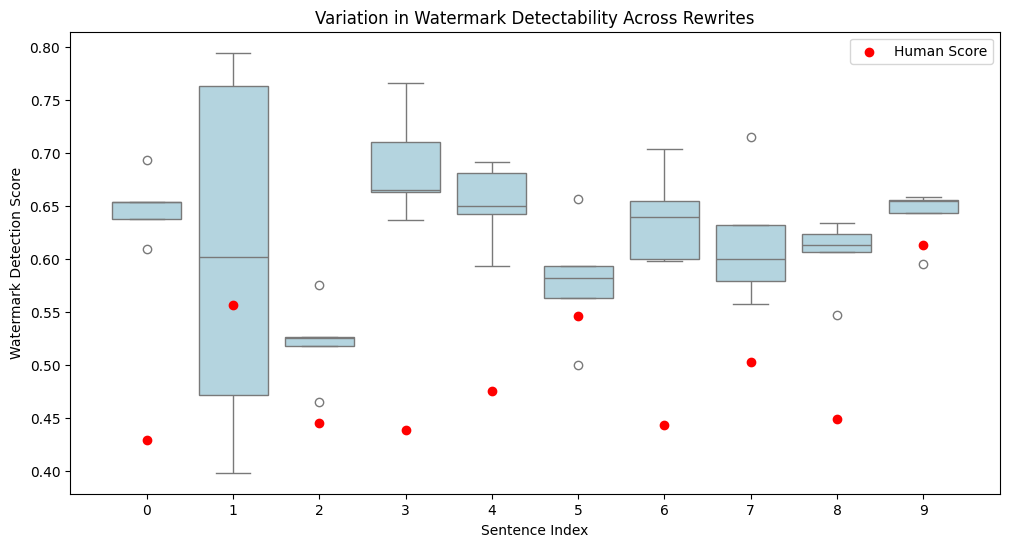

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the data
result_file = r'/mnt/data2/lian/projects/watermark/watermark-simcse/watermarking/outputs/end2end/c4/twitter-roberta-base-sentiment/128batch_2000epochs/sanity-check/llama4-1gpt4-1/multiple-spoofing-attack.csv'
df = pd.read_csv(result_file)

# Extract columns for rewritten text scores
rewritten_score_columns = [col for col in df.columns if col.startswith('hate_watermarked_text_score_')]

# Create a DataFrame where each row's rewrites are represented as a list
plot_data = df[rewritten_score_columns].copy()
plot_data['Sentence Index'] = range(len(df))  # Add an index for each sentence

# Convert the DataFrame to long format (row-wise melting)
plot_data = plot_data.melt(id_vars=['Sentence Index'], value_vars=rewritten_score_columns, 
                           var_name='Rewrite Index', value_name='Rewrite Score')

# Plot boxplot with each row forming a separate box
plt.figure(figsize=(12, 6))
sns.boxplot(x='Sentence Index', y='Rewrite Score', data=plot_data, color='lightblue')

# Overlay the original human scores
plt.scatter(range(len(df)), df['human_score'], color='red', label='Human Score', zorder=3)

# Formatting
plt.xlabel("Sentence Index")
plt.ylabel("Watermark Detection Score")
plt.title("Variation in Watermark Detectability Across Rewrites")
plt.legend()
plt.xticks(range(len(df)))  # Ensure x-axis ticks align with sentence indices
plt.show()


# Edit distance

In [1]:
import numpy as np

def word_level_edit_distance(text1, text2):
    # 将文本分割成单词
    words1 = text1.split()
    words2 = text2.split()
    
    # 初始化动态规划矩阵
    len1 = len(words1)
    len2 = len(words2)
    dp = np.zeros((len1 + 1, len2 + 1), dtype=int)
    
    # 填充第一列和第一行
    for i in range(len1 + 1):
        dp[i][0] = i
    for j in range(len2 + 1):
        dp[0][j] = j
    
    # 填充动态规划矩阵
    for i in range(1, len1 + 1):
        for j in range(1, len2 + 1):
            if words1[i - 1] == words2[j - 1]:
                dp[i][j] = dp[i - 1][j - 1]  # 如果单词相同，不需要操作
            else:
                dp[i][j] = min(
                    dp[i - 1][j] + 1,   # 删除
                    dp[i][j - 1] + 1,   # 插入
                    dp[i - 1][j - 1] + 1  # 替换
                )
    
    return dp[len1][len2]


## Edit distance btw watermared & spoofing attack

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
# Wrap the apply function with tqdm for progress tracking
tqdm.pandas()

result_file = r''
df = pd.read_csv(result_file)
df.columns

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
# Wrap the apply function with tqdm for progress tracking
tqdm.pandas()

result_file = r''
df = pd.read_csv(result_file)

# Compute edit distances for paraphrase columns
paraphrase_distances = df.progress_apply(lambda x: word_level_edit_distance(x['original'], x[col]), axis=1)
paraphrase_distances.extend(df_all_filtered[f'edit_distance_{col}'].tolist())

# Compute edit distances for spoofing columns
spoofing_distances = []
for col in df_all_filtered.columns:
    if col.startswith('spoofing'):
        df_all_filtered[f'edit_distance_{col}'] = df_all_filtered.progress_apply(lambda x: word_level_edit_distance(x['original'], x[col]), axis=1)
        spoofing_distances.extend(df_all_filtered[f'edit_distance_{col}'].tolist())

# Plot distributions
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(paraphrase_distances, bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Word-Level Edit Distances (Paraphrase)')
plt.xlabel('Edit Distance')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(spoofing_distances, bins=30, color='red', alpha=0.7)
plt.title('Distribution of Word-Level Edit Distances (Spoofing)')
plt.xlabel('Edit Distance')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Word count distribution

## - compare word count distribution btw original & watermarked text

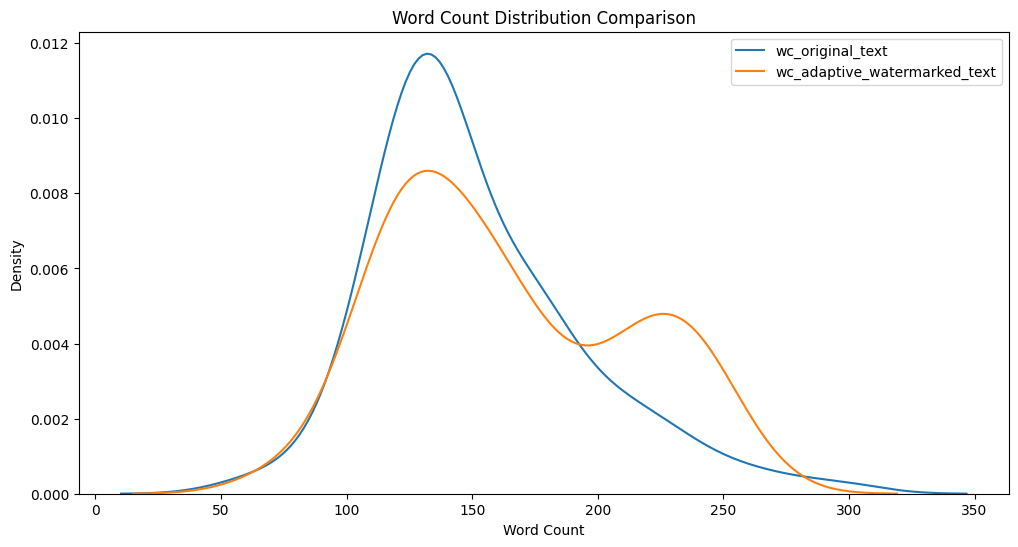

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

result_path = r'/blue/buyuheng/li_an.ucsb/projects/watermark-simcse/watermarking/outputs/end2end/imdb/twitter-roberta-base-sentiment/128batch_87epochs/sanity-check/llama8-0gpt8-1-0/watermark-loss_cl0.0-tl1.0-wneg999-margin0.8-10sent-alpha2.0-delta0.2|0.5.csv'

# Load the data
df = pd.read_csv(result_path)

columns = ['original_text', 'adaptive_watermarked_text']
for col in columns:
    df[f'wc_{col}'] = df[col].apply(lambda x: len(x.split()))

# Plot the word count distributions
# Filter columns that start with 'wc_'
wc_columns = [col for col in df.columns if col.startswith('wc_')]

# Plot the word count distributions
plt.figure(figsize=(12, 6))
for col in wc_columns:
    sns.kdeplot(df[col], label=col)

plt.xlabel('Word Count')
plt.ylabel('Density')
plt.title('Word Count Distribution Comparison')
plt.legend()
plt.show()

In [ ]:
# Filter rows where 'adaptive_watermarked_text' does not end with a punctuation mark after stripping whitespace

import string

# Define a list of punctuation marks
punctuation_marks = string.punctuation

filtered_df = df[~df['adaptive_watermarked_text'].str.strip().str.endswith(tuple(punctuation_marks))]

print(filtered_df.shape)
filtered_df['adaptive_watermarked_text'].str[-30:]


(18, 13)


9     classic, old Hollywood romance
10    the text, maintaining the same
17    r offering featuring the actor
29     captivating, engaging quality
33    ion. The overall effect leaves
42    stounded that AZN has garnered
55    e pre computer-generated title
59    e, "we need a dash of disorder
60    ptivating Moor on his majestic
63    thout hitting viewers over the
71    ld give  D grade to it overall
73    the best, in a string of shows
78    cter who eats a Banana is from
87    iual quintessentially quintess
89    atch it again, again and again
90    period in the evolution of the
97    e, the home life portrayed, it
99    s who can appreciate the value
Name: adaptive_watermarked_text, dtype: object

In [2]:
df.columns

Index(['text_id', 'original_text', 'adaptive_watermarked_text',
       'watermarked_corrected_text', 'paraphrased_watermarked_text',
       'hate_watermarked_text', 'human_score',
       'adaptive_watermarked_text_score', 'corrected_watermarked_score',
       'paraphrased_watermarked_text_score', 'hate_watermarked_text_score'],
      dtype='object')